## Use Jupyter notebook as collaboration tool

### Learning Python by web scraping

In [23]:
####################################################
# Goal : Scraping the data on Zika virus           #
# Author : Jean-Claude Razafindrakoto              #
# Date : 2016-09-06                                #
# Python : 3.5.2 (Anaconda 4.1.11)                 #
####################################################

# FOR WEB SCRAPING
from lxml import html
import requests


# FOR FUNCTIONAL PROGRAMMING
import cytoolz  # pipe
import cytoolz.curried  # map

# FOR DATA WRANGLING
import pandas as pd # use of R like dataframes
import re #re for regular expressions

#### Scraping data from the WHO

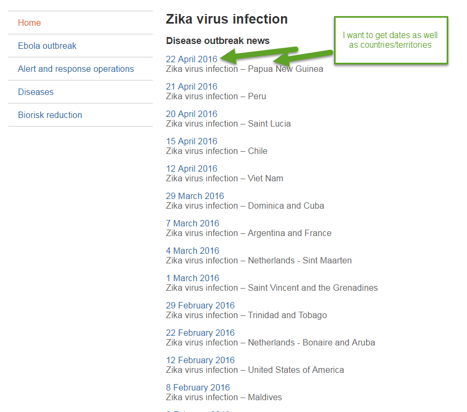

In [2]:
from IPython.display import Image
Image("img/init.png")

#### Expected results

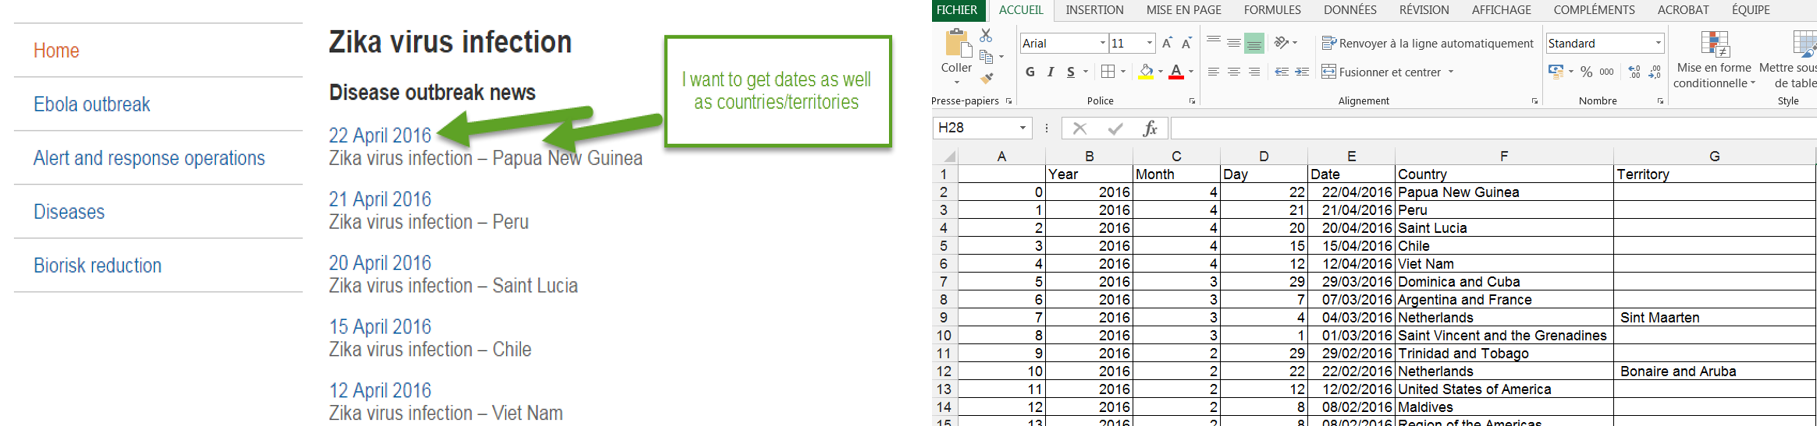

In [3]:
from IPython.display import Image
Image("img/target_result.png")

In [4]:
### Target URL
outbreakNewsURL = "http://www.who.int/csr/don/archive/disease/zika-virus-infection/en/"
#outbreakNewsURL ="http://www.who.int/csr/don/archive/disease/zika-virus-infection/fr/"
# French version#"http://www.who.int/csr/don/archive/disease/zika-virus-infection/fr/"
page = requests.get(outbreakNewsURL)
tree = html.fromstring(page.content)
newsXPath = '//li'
zikaNews = tree.xpath(newsXPath)

#### Techniques used
- Regular expressions
- Pythonic / Functional programming :
   * use lists (iterable) : 
      - avoid looping on indices whenever possible
      - list / for comprehensions
   * pipe and map essentially : (based on cytoolz)
- Extracting data from tree : 
   * lxml (Python library)
   * XPath (web page content)

In [6]:
### Store the relevant news in a list
zikaNews_dirty = [p.text_content() for p in zikaNews]

In [18]:
# Printing the first 50 elements
zikaNews_dirty[1:50] # omitting first element

['\n        Navigation Alt+1\n      ',
 '\n        Content Alt+2\n      ',
 '\n      \n          Home\n        \n      ',
 '\n        \n          Health topics\n        \n      ',
 '\n        \n          Data\n        \n      ',
 '\n        \n          Media centre\n        \n      ',
 '\n        \n          Publications\n        \n      ',
 '\n        \n          Countries\n        \n      ',
 '\n        \n          Programmes\n        \n      ',
 '\n        \n          Governance\n        \n      ',
 '\n        \n          About WHO\n        \n      ',
 'Home\n',
 'Ebola outbreak\n',
 'Alert and response operations\n',
 'Diseases\n',
 'Biorisk reduction\n',
 '\n22 April 2016\n\t\t\tZika virus infection – Papua New Guinea\n',
 '\n21 April 2016\n\t\t\tZika virus infection – Peru\n',
 '\n20 April 2016\n\t\t\tZika virus infection – Saint Lucia\n',
 '\n15 April 2016\n\t\t\tZika virus infection – Chile\n',
 '\n12 April 2016\n\t\t\tZika virus infection – Viet Nam\n',
 '\n29 March 2016\n\t\t

###### The extracted tree still contains much noise

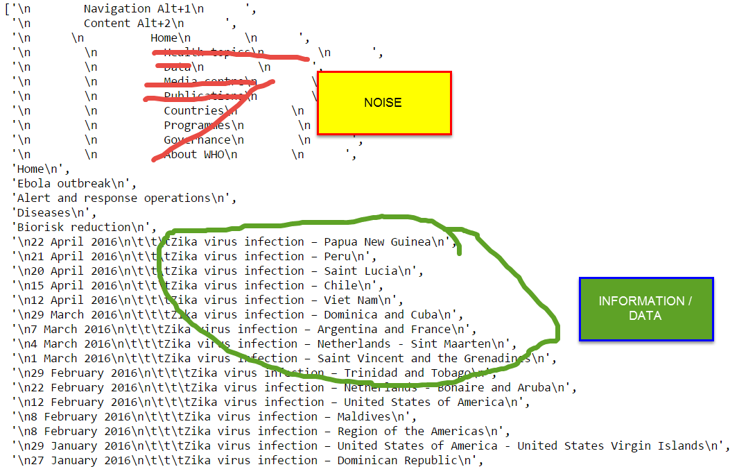

In [22]:
from IPython.display import Image
Image("img/flatten_tree_data.png")

In [20]:
# Extract only the items containing the pattern "Zika virus infection "
#sample= '\n22 April 2016\n\t\t\tZika virus infection – Papua New Guinea - USA\n'

keywdEN ="Zika virus infection "
zikaNews_content = [s for s in zikaNews_dirty if re.search(keywdEN, s)] 

In [21]:
zikaNews_content

['\n22 April 2016\n\t\t\tZika virus infection – Papua New Guinea\n',
 '\n21 April 2016\n\t\t\tZika virus infection – Peru\n',
 '\n20 April 2016\n\t\t\tZika virus infection – Saint Lucia\n',
 '\n15 April 2016\n\t\t\tZika virus infection – Chile\n',
 '\n12 April 2016\n\t\t\tZika virus infection – Viet Nam\n',
 '\n29 March 2016\n\t\t\tZika virus infection – Dominica and Cuba\n',
 '\n7 March 2016\n\t\t\tZika virus infection – Argentina and France\n',
 '\n4 March 2016\n\t\t\tZika virus infection – Netherlands - Sint Maarten\n',
 '\n1 March 2016\n\t\t\tZika virus infection – Saint Vincent and the Grenadines\n',
 '\n29 February 2016\n\t\t\tZika virus infection – Trinidad and Tobago\n',
 '\n22 February 2016\n\t\t\tZika virus infection – Netherlands - Bonaire and Aruba\n',
 '\n12 February 2016\n\t\t\tZika virus infection – United States of America\n',
 '\n8 February 2016\n\t\t\tZika virus infection – Maldives\n',
 '\n8 February 2016\n\t\t\tZika virus infection – Region of the Americas\n',
 '\n2

In [ ]:
#### Data cleansing using Pandas
substitudeUnicodeDash = lambda s : re.sub(u'–',"@", s)
substituteNonUnicode = lambda s : re.sub(r"\s"," ",s)
removeSpace = lambda s: s.strip()
zikaNews_dirty = [cytoolz.pipe(s, removeSpace, substituteNonUnicode) for s in zikaNews_content] # a bit ugly
zikaNews_dirty = [s.split("Zika virus infection") for s in zikaNews_dirty ]
zika = pd.DataFrame(zikaNews_dirty, columns = ["Date","Locations"])